1. Linear Regression and Metrics Calculation
A1.A2.A3 Train a linear regression model and make predictions.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load your dataset
data = pd.read_csv('Obesity.csv')

# Define input features and target output
X = data[['Age', 'Height', 'Weight']]  # Example of input features
y = data['NObeyesdad']  # Target column (categorical)

# Convert the target variable (y) to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Perform prediction on the training set
y_train_pred = reg.predict(X_train)

# Perform prediction on the test set
y_test_pred = reg.predict(X_test)

# Calculate and print metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")

print("\nTest Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


Train Set Metrics:
MSE: 3.098732948748777, RMSE: 1.76032183101522, MAPE: 982642459078302.1, R²: 0.19160103461375155

Test Set Metrics:
MSE: 2.937713131438777, RMSE: 1.7139758258034963, MAPE: 1012496778030339.9, R²: 0.20455607476936244


A4. Perform k-means clustering.

C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Cluster Centers:
[[2.35731989e+01 1.67499030e+00 6.88422372e+01 2.32242778e+00
  2.60861936e+00 1.94309797e+00 1.07111021e+00 6.67666932e-01
  5.55209953e-01 4.44790047e-01 7.77604977e-04 4.19906687e-02
  5.76982893e-01 3.80248834e-01 1.78849145e-01 8.21150855e-01
  9.26905132e-01 7.30948678e-02 9.80559876e-01 1.94401244e-02
  2.95489891e-01 7.04510109e-01 3.65474339e-02 1.81959565e-01
  7.43390358e-01 3.81026439e-02 2.43390358e-01 4.66562986e-03
  7.77604977e-03 7.05287714e-01 3.88802488e-02]
 [2.54651692e+01 1.74327681e+00 1.14244911e+02 2.56964579e+00
  2.80566827e+00 2.10919768e+00 9.15503888e-01 6.42588230e-01
  3.98787879e-01 6.01212121e-01 1.78893358e-18 1.93939394e-02
  7.98787879e-01 1.81818182e-01 1.81818182e-02 9.81818182e-01
  9.97575758e-01 2.42424242e-03 9.76969697e-01 2.30303030e-02
  6.06060606e-03 9.93939394e-01 7.27272727e-03 9.69696970e-03
  9.80606061e-01 2.42424242e-03 1.74545455e-01 1.21212121e-03
  1.21212121e-03 8.15757576e-01 7.27272727e-03]]


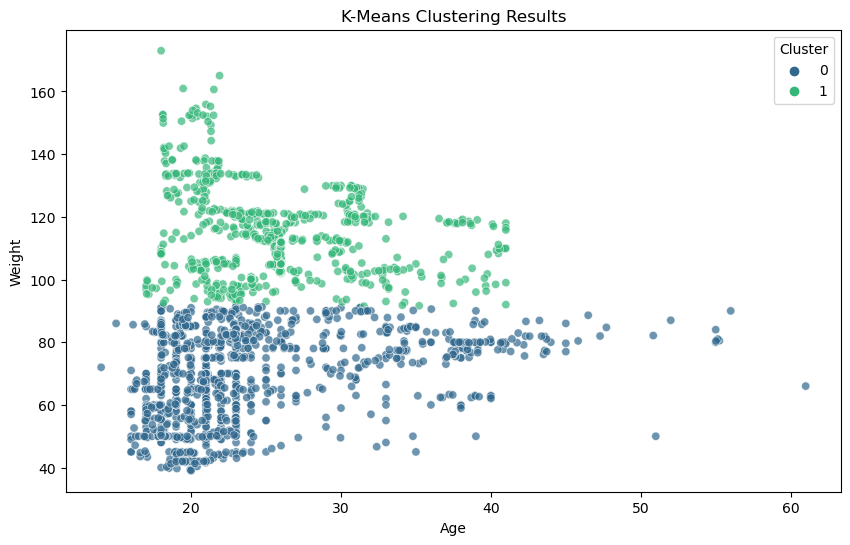

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('Obesity.csv')

# Define features (excluding target variable)
X = data[['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O',
          'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']]

# Convert categorical features to dummy variables (if necessary)
X = pd.get_dummies(X)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Print cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Add cluster labels to the original data for visualization
data['Cluster'] = labels

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Weight', hue='Cluster', data=data, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(title='Cluster')
plt.show()

A5. Calculate clustering metrics.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming X_train is your training data without the target variable
# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

# Calculate the Silhouette Score
sil_score = silhouette_score(X_train, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Calculate the Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
print(f"Calinski-Harabasz Score: {ch_score}")

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(X_train, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.5721698831291234
Calinski-Harabasz Score: 3492.645371185126
Davies-Bouldin Index: 0.5792722413979938


C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


A6. Perform k-means clustering for different values of k and evaluate metrics.

C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

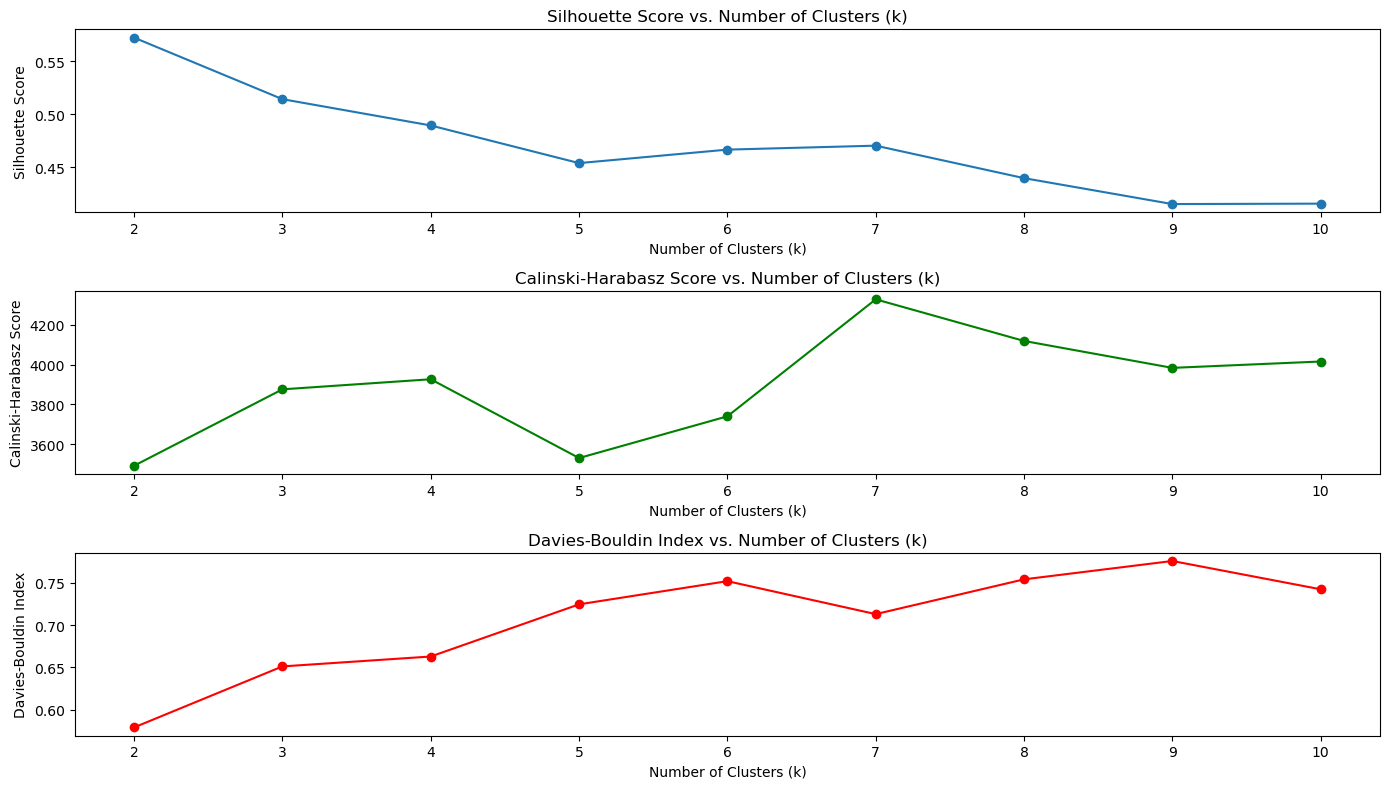

In [4]:
#Question6
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Initialize lists to store the scores for different values of k
silhouette_scores = []
ch_scores = []
db_scores = []

# Define the range of k values to test
k_values = range(2, 11)

# Loop over the range of k values
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    
    # Calculate the Silhouette Score
    sil_score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    # Calculate the Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
    ch_scores.append(ch_score)
    
    # Calculate the Davies-Bouldin Index
    db_index = davies_bouldin_score(X_train, kmeans.labels_)
    db_scores.append(db_index)

# Plot the scores for each k value
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(3, 1, 2)
plt.plot(k_values, ch_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(3, 1, 3)
plt.plot(k_values, db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

A7. Use the elbow method to determine the optimal k.


C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

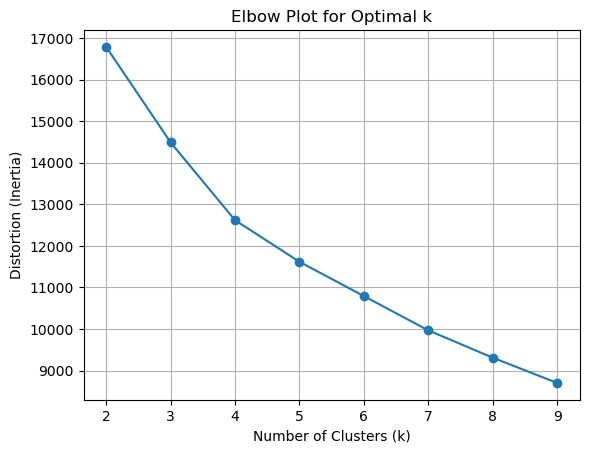

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('Obesity.csv')

X_cluster = data[['Age', 'Height', 'Weight', 'CALC', 'FCVC', 'NCP', 'FAF', 'TUE']]

X_cluster = pd.get_dummies(X_cluster, drop_first=True)

# Make sure to scale the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Test K-Means clustering with different values of k
distortions = []
for k in range(2, 10):  # You can adjust the range based on your dataset
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    distortions.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Plot distortions (Elbow Method)
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()